In [8]:
import pandas as pd

In [9]:
data=pd.read_csv('pps_data.csv',index_col=0)
target=pd.read_csv('pps_target.csv',index_col=0)
sample_submission=pd.read_csv('sample_submission_raw.csv',index_col=0)

In [10]:
data.index = pd.to_datetime(data.index,format='%Y-%m-%d')
target.index = pd.to_datetime(target.index,format='%Y-%m-%d')

In [11]:
data_mms=data.copy()

In [12]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms_2018 = MinMaxScaler()
mms_2019 = MinMaxScaler()
mms_2020 = MinMaxScaler()
mms_2021 = MinMaxScaler()


df_2018_raw.iloc[:,:4] = mms_2018.fit_transform(df_2018_raw.iloc[:,:4])
df_2019_raw.iloc[:,:4] = mms_2019.fit_transform(df_2019_raw.iloc[:,:4])
df_2020_raw.iloc[:,:4] = mms_2020.fit_transform(df_2020_raw.iloc[:,:4])
df_2021_raw.iloc[:,:4] = mms_2021.fit_transform(df_2021_raw.iloc[:,:4])

In [23]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [29]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,2]],df_2019_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,2]],df_2021_week_mean.iloc[:,[0,1,2]],on=['주','주말평일'])
result_1=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [30]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,3]],df_2019_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,3]],df_2021_week_mean.iloc[:,[0,1,3]],on=['주','주말평일'])
result_2=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [31]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,4]],df_2019_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,4]],df_2021_week_mean.iloc[:,[0,1,4]],on=['주','주말평일'])
result_3=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [32]:
temp_1=pd.merge(df_2018_week_mean.iloc[:,[0,1,5]],df_2019_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
temp_2=pd.merge(df_2020_week_mean.iloc[:,[0,1,5]],df_2021_week_mean.iloc[:,[0,1,5]],on=['주','주말평일'])
result_4=pd.merge(temp_1,temp_2,on=['주','주말평일'])

In [39]:
result_1

,주,주말평일,광진구_x_x,광진구_y_x,광진구_x_y,광진구_y_y,mean_광진구
0,1,주말,0.053458,0.106525,0.206283,0.043940,0.102551
1,1,평일,0.092121,0.166236,0.265149,0.109433,0.158235
2,2,주말,0.040793,0.135649,0.202795,0.106087,0.121331
3,2,평일,0.051469,0.162591,0.174121,0.128487,0.129167
4,3,주말,0.066783,0.132767,0.199364,0.273314,0.168057
...,...,...,...,...,...,...,...
98,50,주말,0.149184,0.287884,0.209993,0.117106,0.191042
99,50,평일,0.227133,0.321788,0.392735,0.362214,0.325968
100,51,주말,0.190559,0.227301,0.189571,0.099637,0.176767
101,51,평일,0.277343,0.320417,0.222765,0.382370,0.300724


In [36]:
result_1['mean_광진구'] = result_1.iloc[:,2:].mean(axis=1)
result_2['mean_동대문구'] = result_2.iloc[:,2:].mean(axis=1)
result_3['mean_성동구'] = result_3.iloc[:,2:].mean(axis=1)
result_4['mean_중랑구'] = result_4.iloc[:,2:].mean(axis=1)

In [41]:
result=pd.concat([result_1.loc[:,['주','주말평일','mean_광진구']],result_2.loc[:,['주','주말평일','mean_동대문구']],result_3.loc[:,['주','주말평일','mean_성동구']],result_4.loc[:,['주','주말평일','mean_중랑구']]],axis=1)
result=result.iloc[:,[0,1,2,5,8,11]]
result

In [54]:
df_2018_raw = data[data.index.year == 2018]
df_2019_raw = data[data.index.year == 2019]
df_2020_raw = data[data.index.year == 2020]
df_2021_raw = data[data.index.year == 2021]

In [55]:
df_2018_week_mean=df_2018_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2019_week_mean=df_2019_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2020_week_mean=df_2020_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()
df_2021_week_mean=df_2021_raw.groupby(['주','주말평일'])[['광진구','동대문구','성동구','중랑구']].mean().reset_index()

In [120]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(df_2021_week_mean.iloc[:,2:])

result_temp = result.copy()

result_temp.iloc[:,2:] = mms.inverse_transform(result_temp.iloc[:,2:].values)

result_temp

,주,주말평일,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,1,주말,2.354750,2.081679,1.927279,1.309386
1,1,평일,3.115328,2.676816,2.850890,1.652131
2,2,주말,2.611259,2.258149,2.111478,1.484104
3,2,평일,2.718293,2.346412,2.547078,1.460186
4,3,주말,3.249491,2.643855,2.823316,1.795445
...,...,...,...,...,...,...
98,50,주말,3.563438,3.239325,2.922461,2.168124
99,50,평일,5.406391,4.796311,4.661332,3.032257
100,51,주말,3.368464,3.020358,2.641571,2.078827
101,51,평일,5.061588,4.522870,4.532095,2.894529


In [121]:
# df_2018_week_mean
# df_2019_week_mean
# df_2020_week_mean
# df_2021_week_mean

In [122]:
temp_1=pd.merge(df_2018_raw.reset_index(),df_2019_raw.reset_index(),on=['주','주말평일'])
temp_2=pd.merge(df_2020_raw.reset_index(),df_2021_raw.reset_index(),on=['주','주말평일'])

diff_df=pd.merge(temp_1,temp_2,on=['주','주말평일'])

df_diff_광진구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('광진구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_동대문구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('동대문구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_성동구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('성동구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)
df_diff_중랑구=diff_df.loc[:,[i for i in diff_df.columns if i.startswith('중랑구')] + ['주','주말평일']].drop_duplicates(['주','주말평일']).reset_index(drop=True)

In [123]:
result_main=result_temp.copy()

In [124]:
df_diff_광진구['diff_mean']=df_diff_광진구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_광진구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_광진구']=result_temp['mean_광진구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_동대문구['diff_mean']=df_diff_동대문구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_동대문구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_동대문구']=result_temp['mean_동대문구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_성동구['diff_mean']=df_diff_성동구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_성동구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_성동구']=result_temp['mean_성동구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

df_diff_중랑구['diff_mean']=df_diff_중랑구.iloc[:,:-2].diff(axis=1).fillna(0).mean(axis=1)
result_temp=result_temp.merge(df_diff_중랑구.iloc[:,-3:],on=['주','주말평일'])
result_temp['mean_중랑구']=result_temp['mean_중랑구'] + result_temp['diff_mean']
result_temp.drop('diff_mean',axis=1,inplace=True)

In [125]:
result_temp

,주,주말평일,mean_광진구,mean_동대문구,mean_성동구,mean_중랑구
0,1,주말,2.432750,2.225679,1.976779,1.410886
1,1,평일,3.714828,3.202316,3.325890,2.014631
2,2,주말,3.016759,2.681149,2.452978,1.787604
3,2,평일,2.986793,2.653412,2.796078,1.705686
4,3,주말,4.030491,3.328855,3.551316,2.306945
...,...,...,...,...,...,...
98,50,주말,3.751938,3.409825,3.048461,2.390124
99,50,평일,6.311391,5.748811,5.326332,3.609257
100,51,주말,3.365464,3.060858,2.549571,2.152327
101,51,평일,5.863088,5.408870,5.243595,3.459529


In [132]:
main=target.merge(result_temp,on=['주','주말평일']).iloc[:,-4:]

In [135]:
import numpy as np
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [136]:
for col in main.columns:
    main[col] = smooth(main[col],10)

In [156]:
sample_submission.iloc[:,1:] = (main.values*1.3)

In [157]:
sample_submission.to_csv('main.csv',index=False)

<AxesSubplot: >

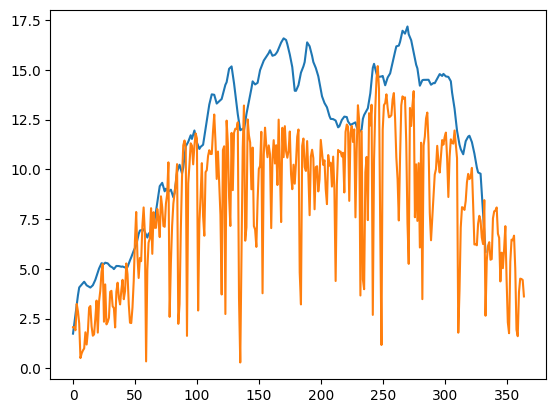

In [152]:
(main.iloc[:,0]*1.3).plot()
df_2021_raw.iloc[:,0].reset_index(drop=True).plot()

<AxesSubplot: >

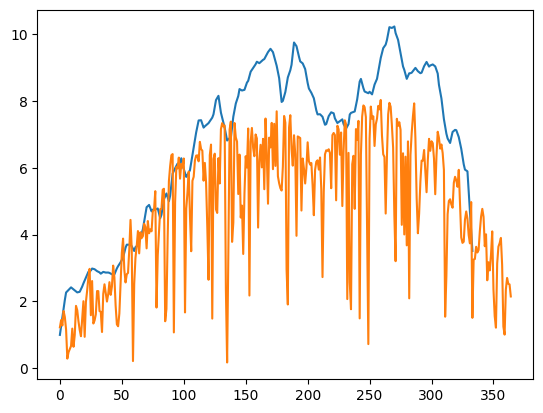

In [155]:
(main.iloc[:,3]*1.3).plot()
df_2021_raw.iloc[:,3].reset_index(drop=True).plot()